     t [s]      T [K]     P [Pa]       u [J/kg]
 1.000e-05     33.584 101325.002  -7.509018e+03
 2.000e-05     32.890 101325.002  -7.509018e+03
 3.000e-05     32.570 101325.002  -7.509018e+03
 4.000e-05     32.355 101325.002  -7.509018e+03
 5.000e-05     32.189 101325.002  -7.509018e+03
 6.000e-05     32.051 101325.002  -7.509018e+03
 7.000e-05     31.932 101325.002  -7.509018e+03
 8.000e-05     31.826 101325.002  -7.509018e+03
 9.000e-05     31.730 101325.002  -7.509018e+03
 1.000e-04     31.643 101325.002  -7.509018e+03
 1.100e-04     31.563 101325.002  -7.509018e+03
 1.200e-04     31.488 101325.002  -7.509018e+03
 1.300e-04     31.419 101325.002  -7.509018e+03
 1.400e-04     31.355 101325.002  -7.509018e+03
 1.500e-04     31.294 101325.002  -7.509018e+03
 1.600e-04     31.237 101325.002  -7.509018e+03
 1.700e-04     31.183 101325.002  -7.509018e+03
 1.800e-04     31.132 101325.002  -7.509018e+03
 1.900e-04     31.084 101325.002  -7.509018e+03
 2.000e-04     31.038 101325.002  -7.509

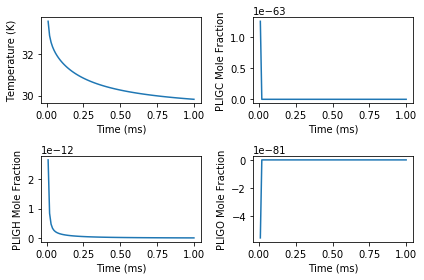

In [61]:
"""
Constant-pressure, adiabatic kinetics simulation.
"""

import sys
import numpy as np

import cantera as ct

gas = ct.Solution('cti_one.cti')
gas.TPX = 300, 101325, 'PLIGC:1.7, PLIGH:0.26, PLIGO:0.3'
r = ct.IdealGasReactor(gas)

sim = ct.ReactorNet([r])
time = 0.0
states = ct.SolutionArray(gas, extra=['t'])

print('%10s %10s %10s %14s' % ('t [s]','T [K]','P [Pa]','u [J/kg]'))
for n in range(100):
    time += 1.e-5
    sim.advance(time)
    states.append(r.thermo.state, t=time*1e3)
    print('%10.3e %10.3f %10.3f %14.6e' % (sim.time, r.T,
                                           r.thermo.P, r.thermo.u))


import matplotlib.pyplot as plt
plt.clf()
plt.subplot(2, 2, 1)
plt.plot(states.t, states.T)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.subplot(2, 2, 2)
plt.plot(states.t, states.X[:,gas.species_index('PLIGC')])
plt.xlabel('Time (ms)')
plt.ylabel('PLIGC Mole Fraction')
plt.subplot(2, 2, 3)
plt.plot(states.t, states.X[:,gas.species_index('PLIGH')])
plt.xlabel('Time (ms)')
plt.ylabel('PLIGH Mole Fraction')
plt.subplot(2, 2, 4)
plt.plot(states.t, states.X[:,gas.species_index('PLIGO')])
plt.xlabel('Time (ms)')
plt.ylabel('PLIGO Mole Fraction')
plt.tight_layout()
plt.show()


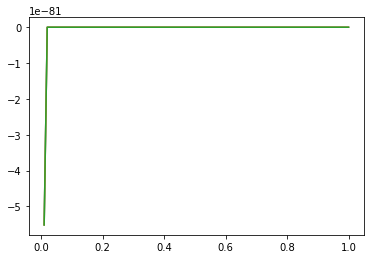